In [2]:
!pip install wordcloud

     -------------------------------------- 300.6/300.6 kB 3.1 MB/s eta 0:00:00


In [3]:
# importar bibliotecas necessárias 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
# leitura do dataset limpo
df = pd.read_csv("C:\\Users\\melis\\OneDrive\\Documentos\\tweets_limpos.csv")

In [5]:
df.dtypes

Unnamed: 0            int64
post_id               int64
post_created         object
post_text            object
user_id               int64
followers             int64
friends               int64
favourites            int64
statuses              int64
retweets              int64
label                 int64
texto_limpo          object
sentimento_VADER    float64
dtype: object

In [6]:
# converter coluna de data para datetime
df['post_created'] = pd.to_datetime(df['post_created'])

In [9]:
# 1- Como os sentimentos mudam ao longo do tempo?
#    Existem padrões sazonais ou eventos específicos que influenciam esses sentimentos?
df['date_day'] = df['post_created'].dt.date
daily_sentiments = df.groupby('date_day')['sentimento_VADER'].mean()

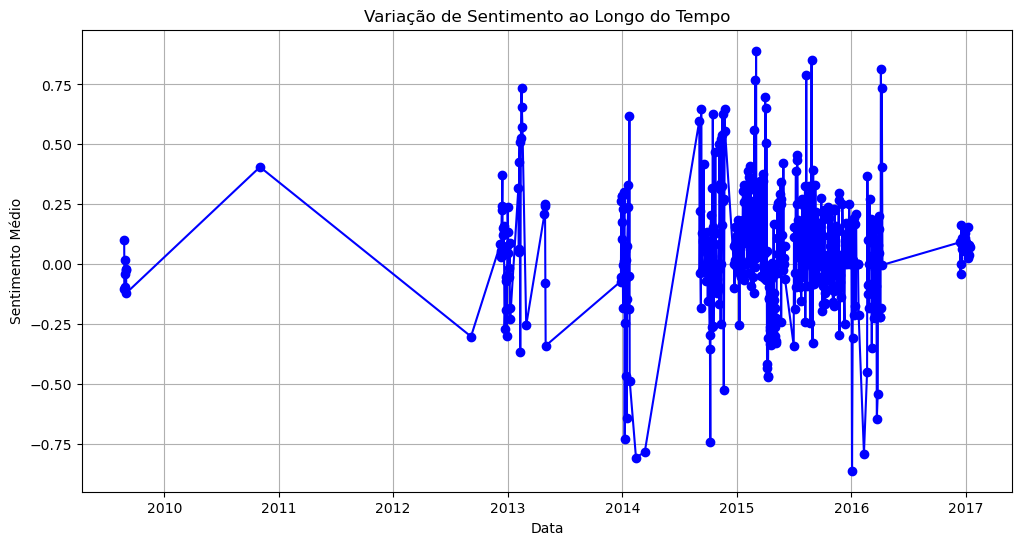

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiments.index, daily_sentiments.values, marker='o', linestyle='-', color='b')
plt.title('Variação de Sentimento ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Sentimento Médio')
plt.grid(True)
plt.show()

In [12]:
# 2- Como os usuários respondem a tweets sobre saúde mental (e.g., retweets, likes, replies)?

# calcula o total de retweets, likes e replies
total_retweets = df['retweets'].sum()
total_likes = df['favourites'].sum()

engajamento = {'Retweets': total_retweets, 'Likes': total_likes}

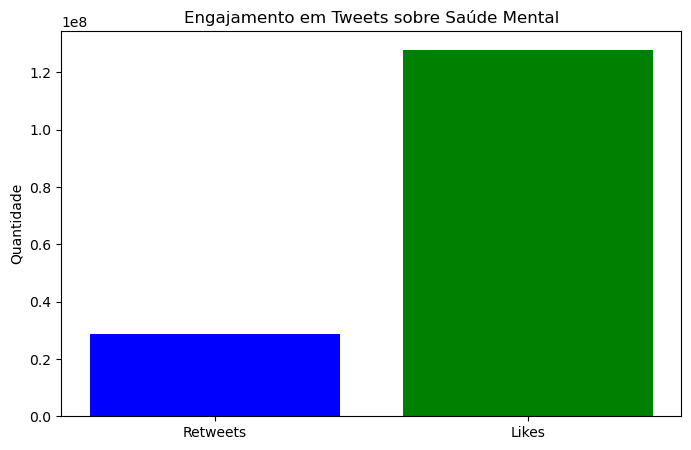

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(engajamento.keys(), engajamento.values(), color=['blue', 'green'])
plt.title('Engajamento em Tweets sobre Saúde Mental')
plt.ylabel('Quantidade')
plt.show()

In [22]:
# 3- Como os sentimentos variam em relação a diferentes condições de saúde mental (e.g., depressão, ansiedade, transtorno bipolar)?
# função para classificação por condição

def classifica_condicao(post_text):
    if 'depression' in post_text.lower():
        return 'Depressão'
    elif 'anxiety' in post_text.lower():
        return 'Ansiedade'
    elif 'bipolar disorder' in post_text.lower():
        return 'Transtorno Bipolar'
    
    
df['Condicao'] = df['texto_limpo'].apply(classifica_condicao)

In [23]:
# análise de sentimentos por categoria
sentimentos_por_condicao = df.groupby('Condicao')['sentimento_VADER'].mean()

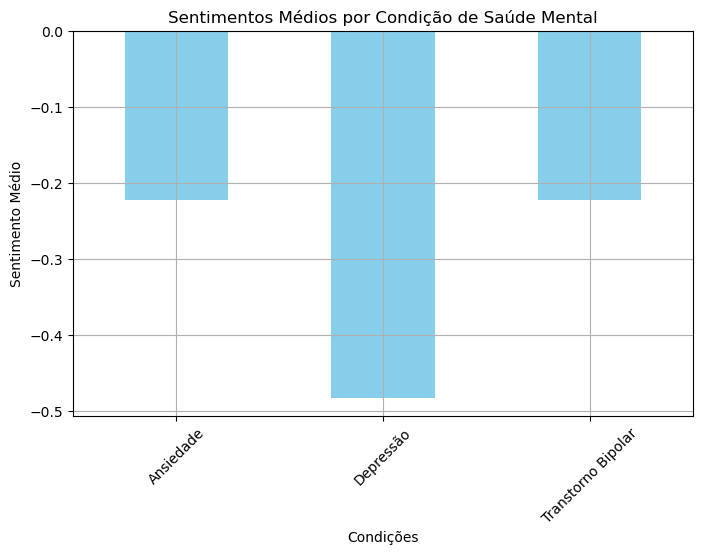

In [24]:
plt.figure(figsize=(8,5))
sentimentos_por_condicao.plot(kind='bar', color='skyblue')
plt.title('Sentimentos Médios por Condição de Saúde Mental')
plt.xlabel('Condições')
plt.ylabel('Sentimento Médio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()